# What is CNN?

A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed to process data with a grid-like topology, such as images. CNNs use convolutional layers to automatically and adaptively learn spatial hierarchies of features from input data. They are highly effective for tasks involving visual imagery due to their ability to capture spatial and temporal dependencies.

## Applications of CNN

- **Image Classification:** Identifying objects or scenes in images (e.g., recognizing handwritten digits).
- **Object Detection:** Locating and classifying multiple objects within an image.
- **Image Segmentation:** Dividing an image into meaningful parts or regions.
- **Facial Recognition:** Identifying or verifying individuals based on facial features.
- **Medical Image Analysis:** Detecting diseases or anomalies in medical scans (e.g., MRI, X-ray).
- **Video Analysis:** Action recognition, tracking, and event detection in videos.
- **Self-driving Cars:** Interpreting visual data from cameras for navigation and obstacle avoidance

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras as ke
import tensorflow.keras

In [2]:
(X_train, Y_train),(X_test, Y_test) = ke.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
Y_train[0]

np.uint8(9)

In [8]:
classes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
classes_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
classes_labels[Y_train[0]]  # Display the label of the first training image

'Ankle boot'

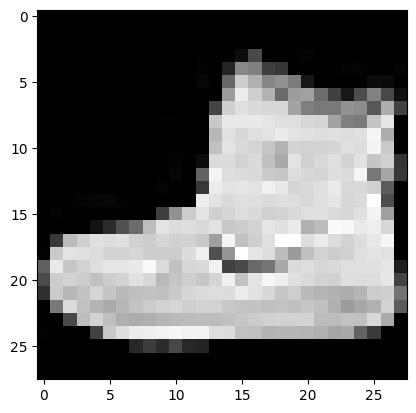

In [11]:
plt.imshow(X_train[0], cmap='gray')

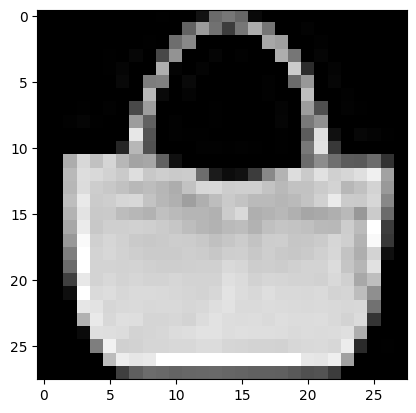

In [12]:
plt.imshow(X_train[100], cmap='gray')
# plt.imshow(X_train[50000], cmap='gray')

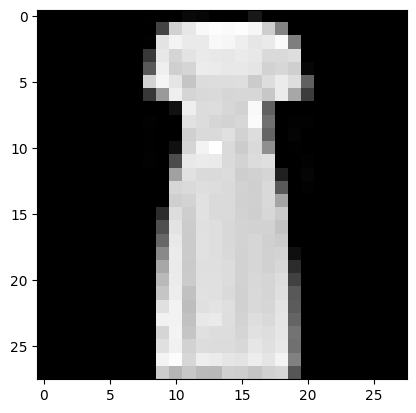

In [13]:
plt.imshow(X_train[50], cmap='gray')

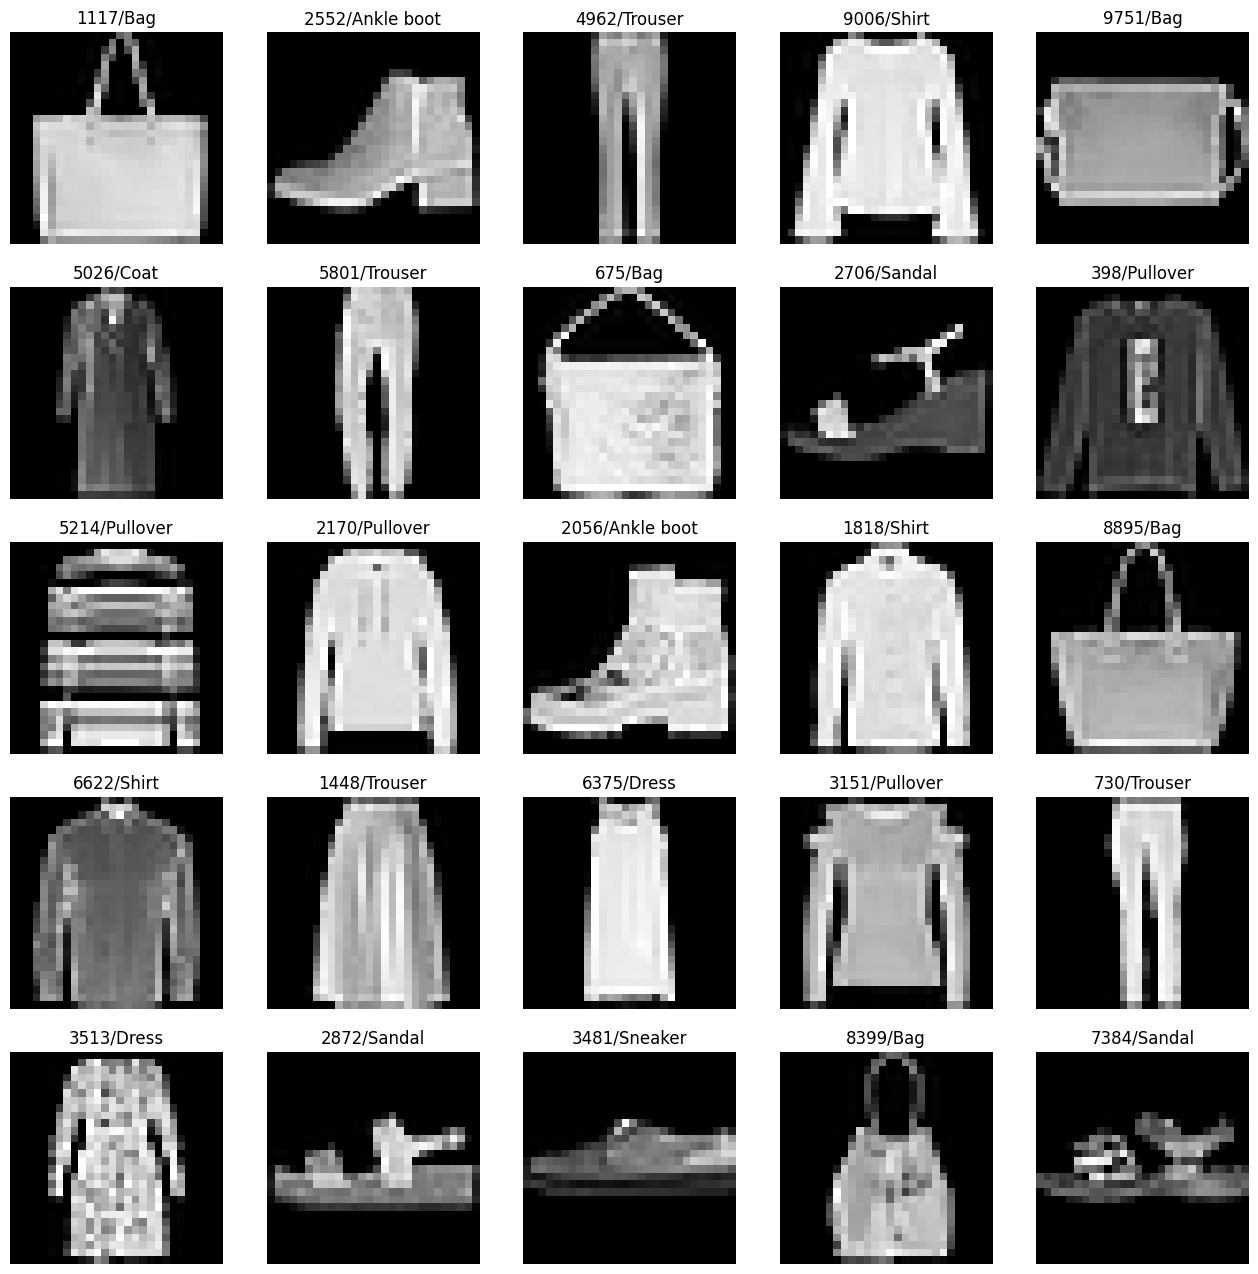

In [14]:
plt.figure(figsize=(16, 16))

j=1

for i in np.random.randint(0, 10000, 25):
    plt.subplot(5, 5, j); j += 1
    plt.imshow(X_train[i], cmap='gray') 
    plt.axis('off')
    # plt.title(classes_labels[Y_train[i]])
    plt.title('{}/{}'.format(i, classes_labels[Y_train[i]]))

In [15]:
fashionMNIST= ke.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashionMNIST.load_data()
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [16]:
eil = np.array(pd.unique(Y_train))
eindex =[]
print(eil)
for i in eil:
    eindex.append(list(Y_train).index(i))
    # eindex.append(np.where(Y_train == i)[0][0])
print(eindex)

[9 0 3 2 7 5 1 6 4 8]
[0, 1, 3, 5, 6, 8, 16, 18, 19, 23]


(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


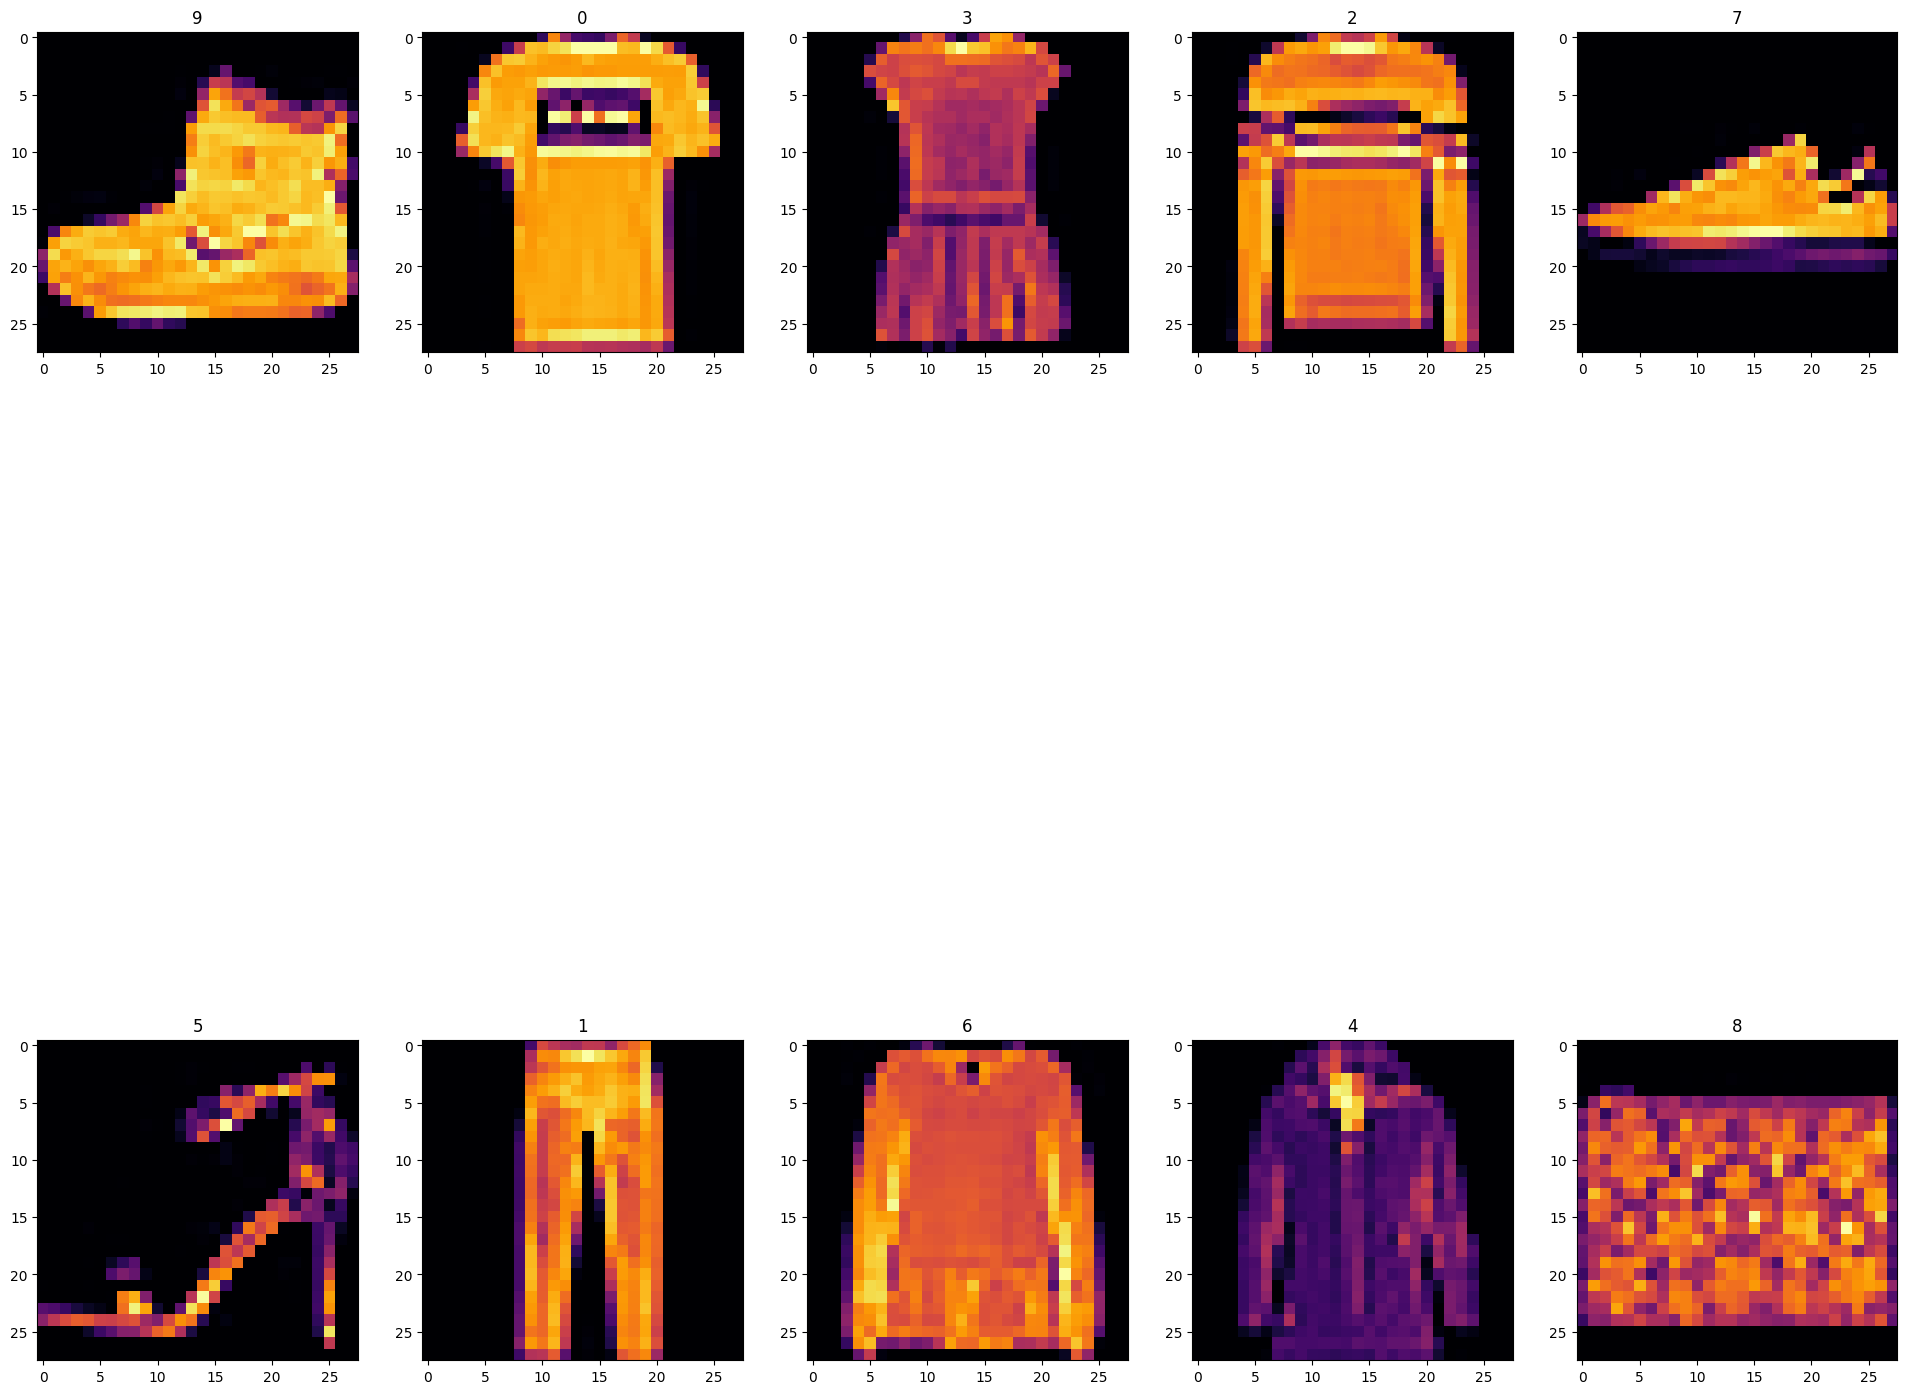

In [17]:
plt.figure(figsize=(24, 24))
for x,y in enumerate(eindex):
    print(X_train[y].shape)
    plt.subplot(2, 5, x+1)
    plt.imshow(tensorflow.squeeze(X_train[y]), cmap='inferno')
    plt.title('{}'.format(eil[x]))

# 🎨 Matplotlib Colormap (`cmap`) Guide

Matplotlib's `imshow()` and other plotting functions use **colormaps** (`cmap`) to map data values to colors. This guide summarizes the most commonly used colormap options, organized by type, with brief descriptions to help you choose the right one for your visualization.

---

## 🔹 Perceptually Uniform Sequential

These colormaps are designed to be uniform in brightness and contrast, making them ideal for scientific data visualization. They maintain a consistent perception of change across the entire range.

- **`viridis`**: Smooth transition from dark purple to yellow. It's the default colormap in Matplotlib and colorblind-friendly.
- **`plasma`**: Goes from deep purple to bright yellow. Offers more contrast than `viridis`.
- **`inferno`**: Black to orange to yellow. Ideal for showing high-contrast heatmaps.
- **`magma`**: Black to purple to off-white. Softer than `inferno`, but still perceptually uniform.
- **`cividis`**: Blue to yellow, optimized for those with color vision deficiencies.

---

## 🔸 Sequential (Light to Dark)

These colormaps go from light to dark or vice versa. They are best for data that progresses from low to high values (like intensity or population density).

- **`Greys`**: Light gray to black.
- **`Blues`**: Light blue to dark blue.
- **`Purples`**: Light purple to deep violet.
- **`Oranges`**: Light orange to burnt orange.
- **`Reds`**: Light red to dark red.

Use these when your data has a clear ordering or magnitude and doesn’t include both positive and negative values.

---

## 🔻 Diverging

Diverging colormaps are ideal when your data has a **meaningful midpoint** (like 0), and you want to show deviation above and below that point.

- **`coolwarm`**: Blue through white to red.
- **`bwr`**: Blue-white-red.
- **`seismic`**: Similar to `bwr` but with stronger contrasts.
- **`PiYG`**: Pink through white to green.

Use these for visualizing things like changes, deltas, or anomalies.

---

## 🔁 Cyclic

These colormaps are used for data that **wraps around cyclically**, such as wind direction, compass bearings, or angles.

- **`twilight`**: Smooth and perceptual cyclic map.
- **`hsv`**: Classic hue circle from red through green and back to red. Not perceptually uniform.

Cyclic maps ensure that the endpoints match in color, useful for wrapping phenomena.

---

## 🎯 Qualitative

Qualitative colormaps are made for **categorical data**


In [18]:
X_train.ndim

4

In [19]:
X_train.shape

(60000, 28, 28, 1)

In [20]:
X_train= np.expand_dims(X_train, axis=-1)
X_test= np.expand_dims(X_test, axis=-1)

In [21]:
X_train.ndim

5

In [22]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [23]:
X_train

array([[[[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        ...,


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]]],



       [[[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

   

In [24]:
X_test

array([[[[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        ...,


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]]],



       [[[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

   

In [25]:
X_train[0]

array([[[[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]]],


       [[[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [27]:
X_train.shape, Y_train.shape

((48000, 28, 28, 1, 1), (48000,))

In [28]:
X_val.shape, Y_val.shape

((12000, 28, 28, 1, 1), (12000,))

<h2>Lets start CNN model</h2>

In [29]:
# Import keras with alias 'ke'
# (make sure you have: from tensorflow import keras as ke)

model = ke.models.Sequential([

    # First convolutional layer: extracts feature maps from input images
    # 64 filters, 3x3 kernel, stride 1, same padding
    ke.layers.Conv2D(64, kernel_size=3, strides=(1, 1), padding='same',input_shape=(28, 28, 1)),

    # Max pooling reduces spatial dimensions, helps make features robust
    ke.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer: deeper features, more filters, stride 2 halves spatial dimensions
    ke.layers.Conv2D(128, kernel_size=3, strides=(2, 2), padding='same',input_shape=(28, 28, 1)),

    # Another max pooling for further downsampling
    ke.layers.MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer: fewer filters, continues extracting spatial features, stride halves again
    ke.layers.Conv2D(64, kernel_size=3, strides=(2, 2), padding='same',input_shape=(28, 28, 1)),

    # Max pooling for more spatial reduction
    ke.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten transforms 2D feature maps into 1D vector for dense layers
    ke.layers.Flatten(),

    # Dense (fully-connected) layer: learns complex patterns (128 units)
    ke.layers.Dense(128, activation='relu'),

    # Dropout: randomly drops 25% of neurons during training to prevent overfitting
    ke.layers.Dropout(0.25),

    # Next dense layer: increases representation capacity (256 units)
    ke.layers.Dense(256, activation='relu'),

    # Stronger dropout to regularize (50% dropout)
    ke.layers.Dropout(0.5),

    # Another dense layer with same size, helps learning complex features
    ke.layers.Dense(256, activation='relu'),

    # Dropout again for regularization (25%)
    ke.layers.Dropout(0.25),

    # Dense layer going back to 128 units for further abstraction
    ke.layers.Dense(128, activation='relu'),

    # Mild dropout (10%) for light regularization
    ke.layers.Dropout(0.10),

    # Output layer: 10 units, softmax activation for multiclass classification
    ke.layers.Dense(10, activation='softmax')
])


a:\Coding\Py\Tensorflow\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
ke.utils.plot_model(model, to_file='model_plot.png' ,show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289,610 (1.10 MB)

 Trainable params: 289,610 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=512,verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.4136 - loss: 1.5250 - val_accuracy: 0.7763 - val_loss: 0.5721
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.7782 - loss: 0.5960 - val_accuracy: 0.8357 - val_loss: 0.4450
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8284 - loss: 0.4751 - val_accuracy: 0.8595 - val_loss: 0.3820
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8527 - loss: 0.4104 - val_accuracy: 0.8744 - val_loss: 0.3475
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8705 - loss: 0.3656 - val_accuracy: 0.8771 - val_loss: 0.3443
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.8837 - loss: 0.3339 - val_accuracy: 0.8857 - val_loss: 0.3196
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8908 - loss: 0.3045 - val_accuracy: 0.8920 - val_loss: 0.3013
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 330ms/step - accuracy: 0.8966 - loss: 0.2869 - val_accuracy: 0.8931 

In [33]:
# Evaluate the model on test data
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [34]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


np.int64(9)

In [35]:
Y_test[0]

np.uint8(9)

In [36]:
y_pred = model.predict(X_test).round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [37]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8962 - loss: 0.3452


[0.3248310685157776, 0.8999000191688538]

<Axes: >

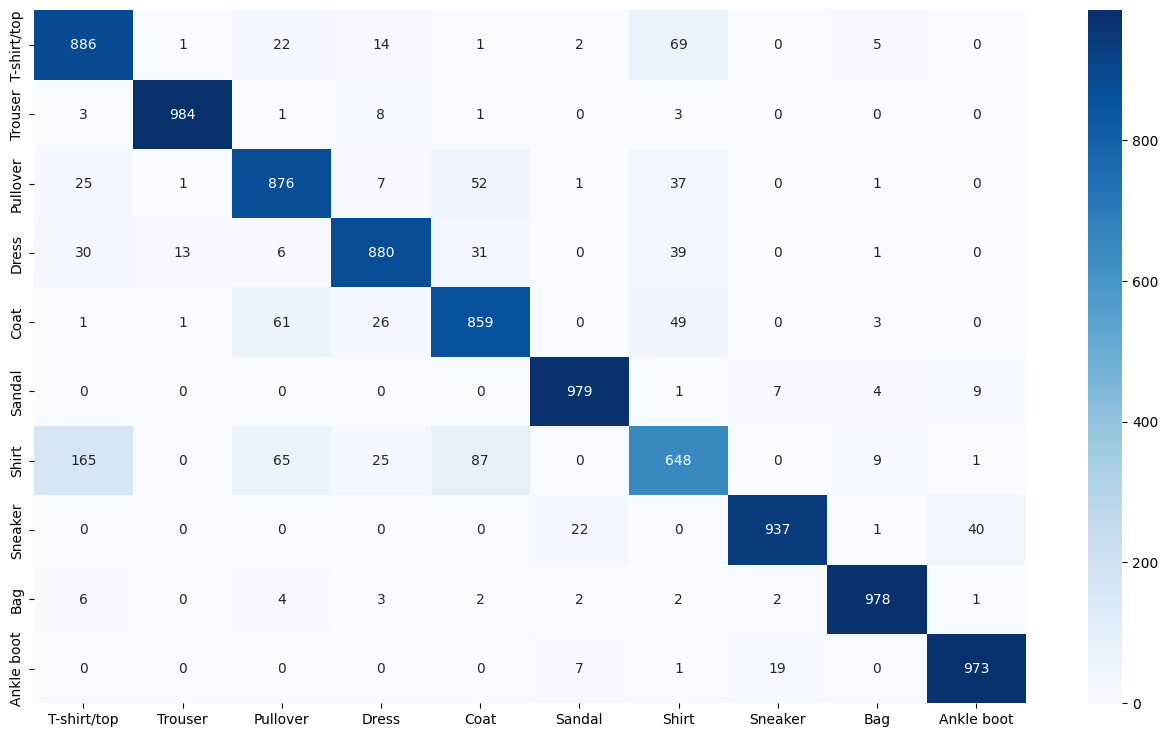

In [38]:
from sklearn.metrics import  confusion_matrix
plt.figure(figsize=(16, 9))

y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(Y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_labels, yticklabels=classes_labels)

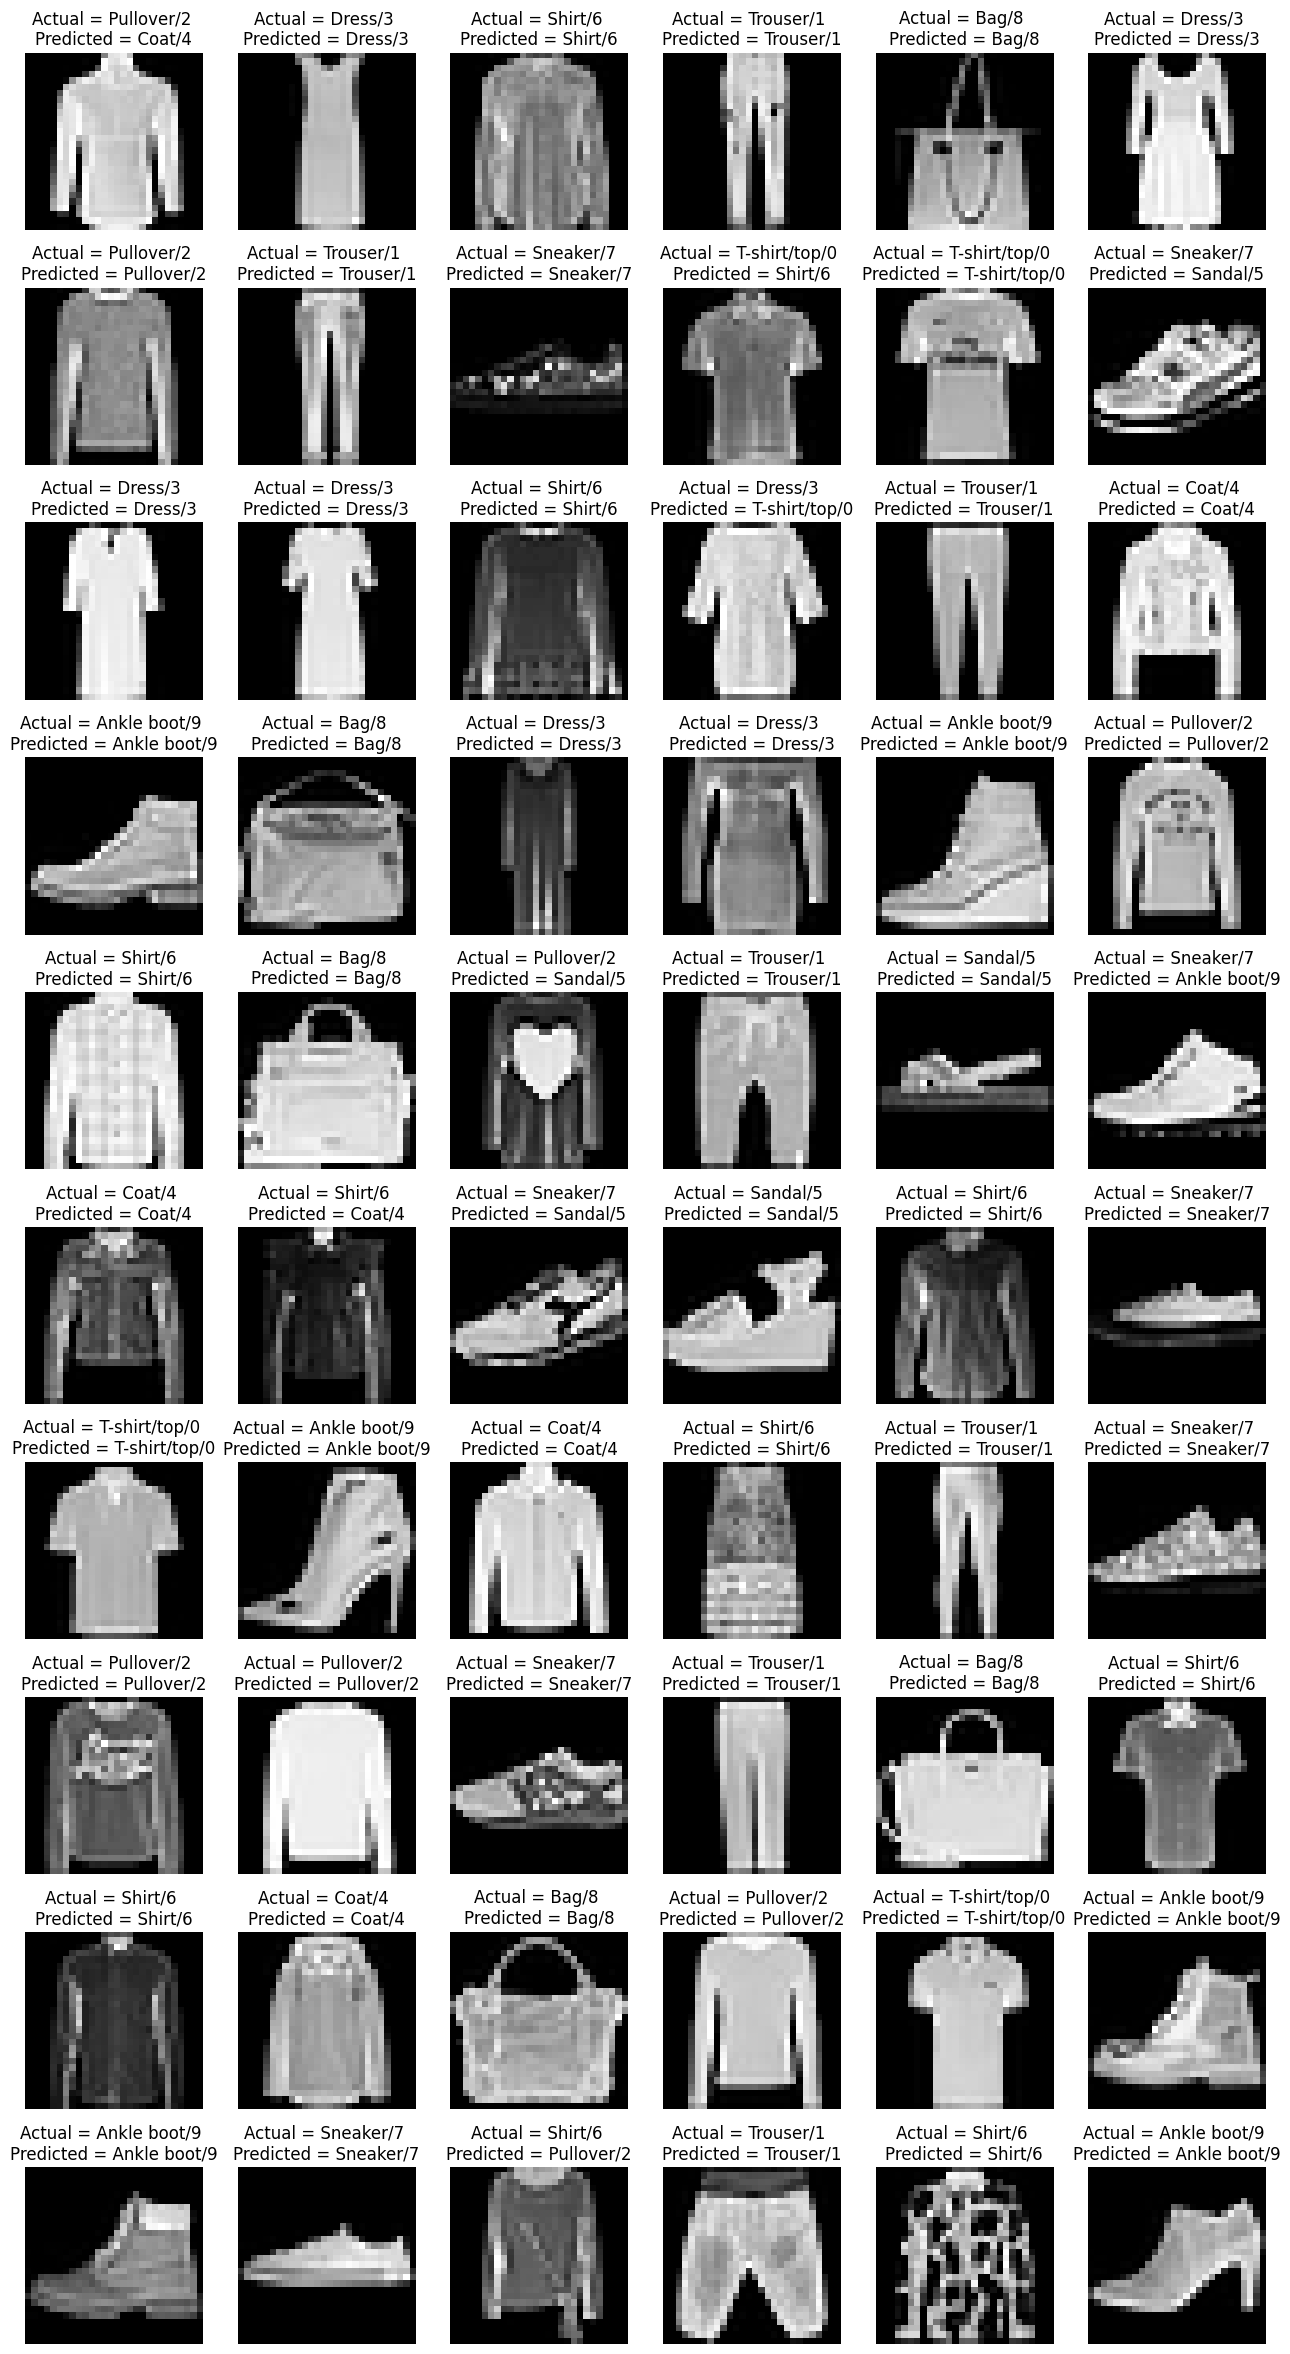

In [39]:
plt.figure(figsize=(16, 30))
j=1
for i in np.random.randint(0, 10000, 60):
    plt.subplot(10, 6, j); j += 1
    plt.imshow(X_test[i].reshape(28,28), cmap='gray') 
    plt.axis('off')
    plt.title('Actual = {}/{} \nPredicted = {}/{}'.format(classes_labels[Y_test[i]], Y_test[i], classes_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))